In [2]:
head(EuStockMarkets)

DAX     SMI    CAC    FTSE  
[1,] 1628.75 1678.1 1772.8 2443.6
[2,] 1613.63 1688.5 1750.5 2460.2
[3,] 1606.51 1678.6 1718.0 2448.2
[4,] 1621.04 1684.1 1708.1 2470.4
[5,] 1618.16 1686.6 1723.1 2484.7
[6,] 1610.61 1671.6 1714.3 2466.8

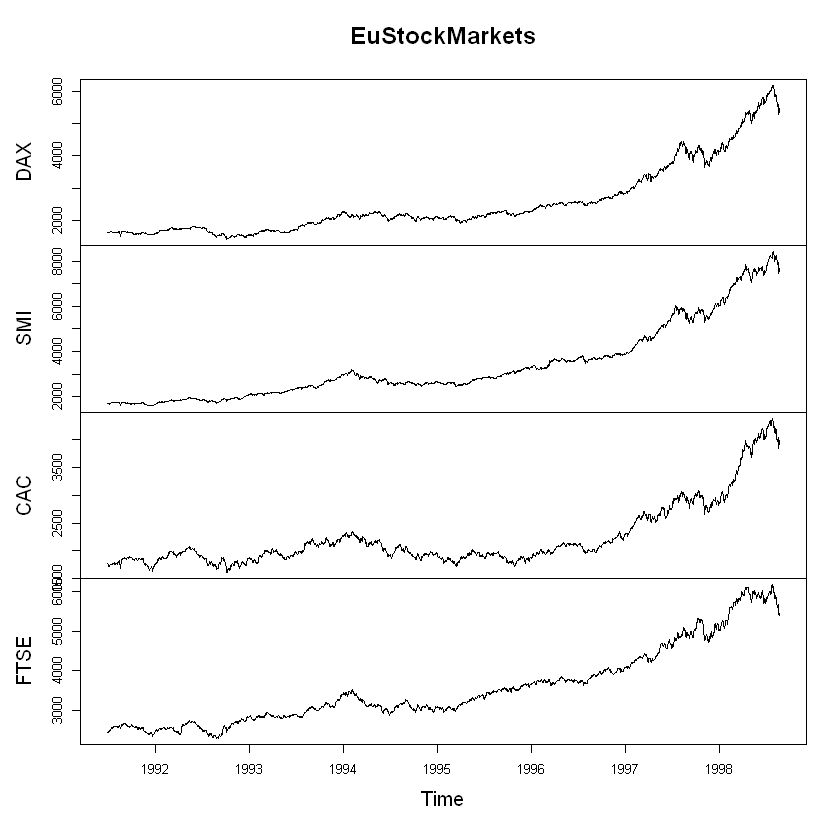

In [3]:
plot(EuStockMarkets)

In [4]:
class(EuStockMarkets)

[1] "mts"    "ts"     "matrix"

In [5]:
frequency(EuStockMarkets)

[1] 260

In [6]:
start(EuStockMarkets)

[1] 1991  130

In [7]:
end(EuStockMarkets)

[1] 1998  169

In [11]:
window(EuStockMarkets, start = 1997, end = 1998)
Time Series:
Start = c(1997, 1)
End = c(1998, 1)
Frequency = 260

ERROR: Error in parse(text = x, srcfile = src): <text>:2:6: unexpected symbol
1: window(EuStockMarkets, start = 1997, end = 1998)
2: Time Series
        ^


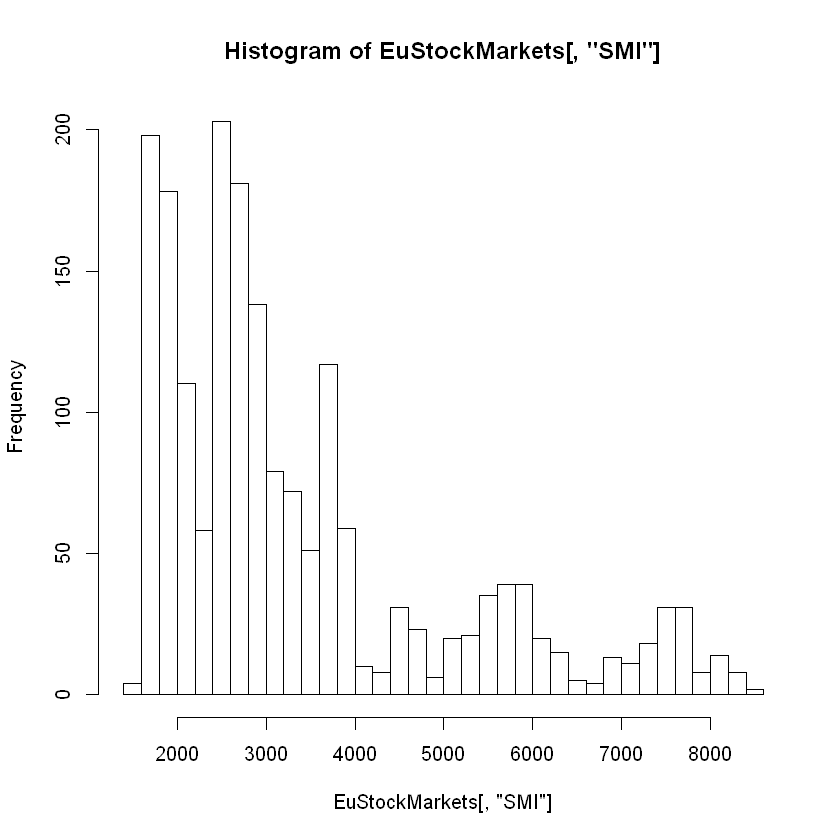

In [12]:
hist( EuStockMarkets[, "SMI"], 30)

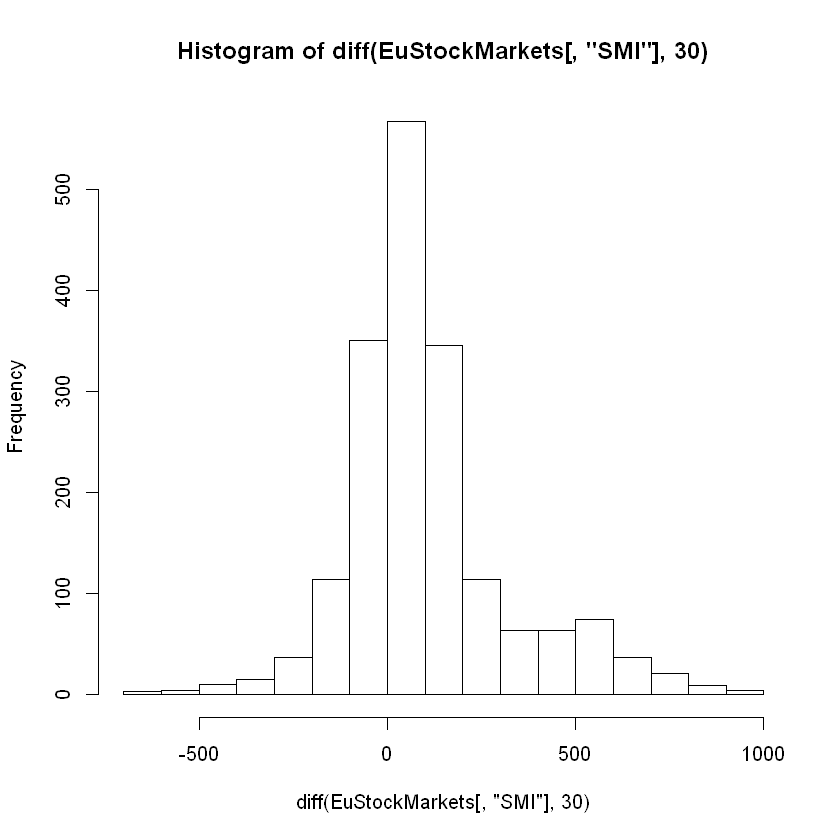

In [13]:
hist(diff(EuStockMarkets[, "SMI"], 30))

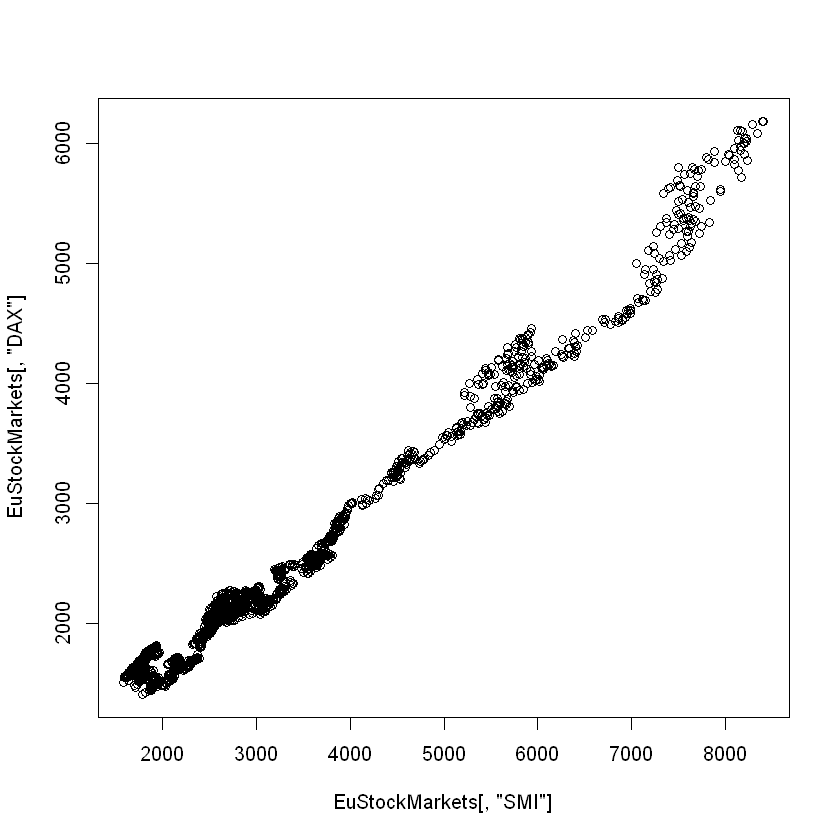

In [14]:
plot( EuStockMarkets[, "SMI"], EuStockMarkets[, "DAX"])

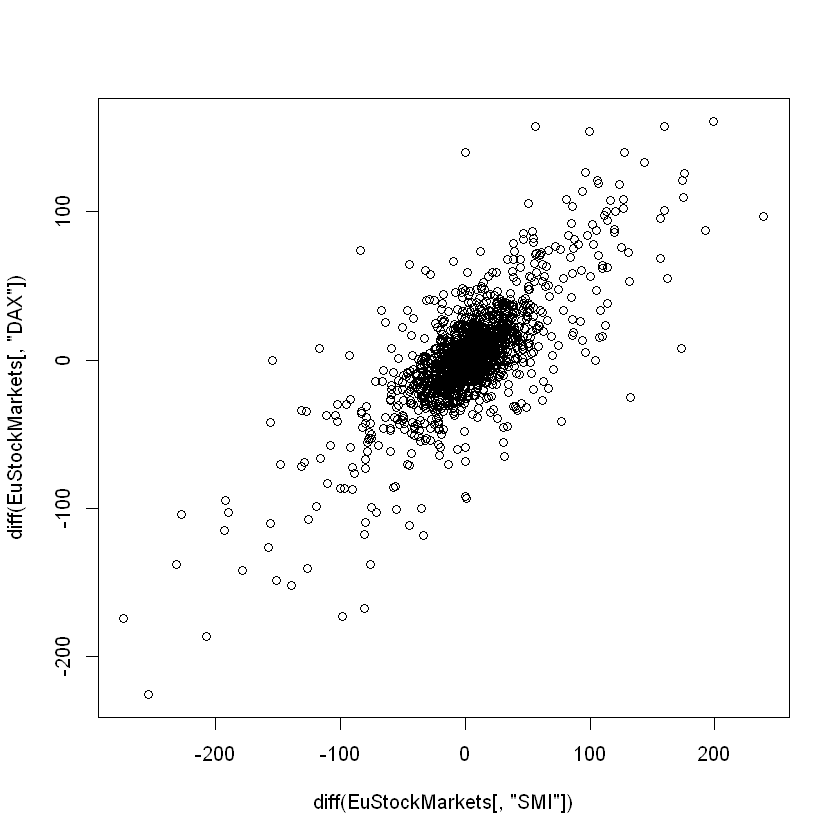

In [15]:
plot(diff(EuStockMarkets[, "SMI"]), diff(EuStockMarkets[, "DAX"]))

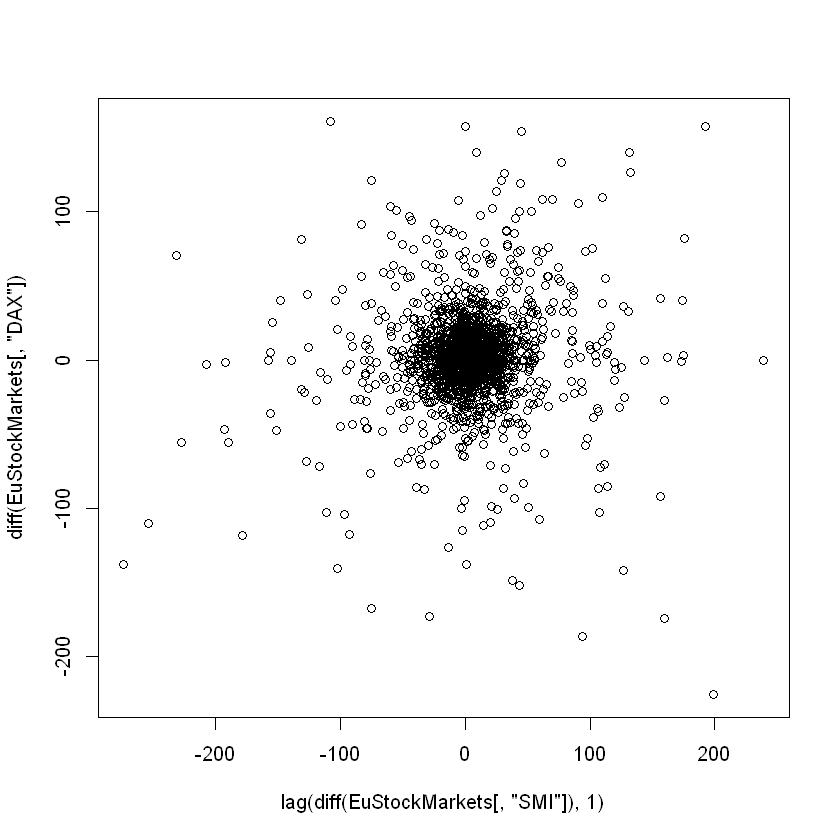

In [16]:
plot(lag(diff(EuStockMarkets[, "SMI"]), 1),
diff(EuStockMarkets[, "DAX"]))

In [17]:
head(AirPassengers)

[1] 112 118 132 129 121 135

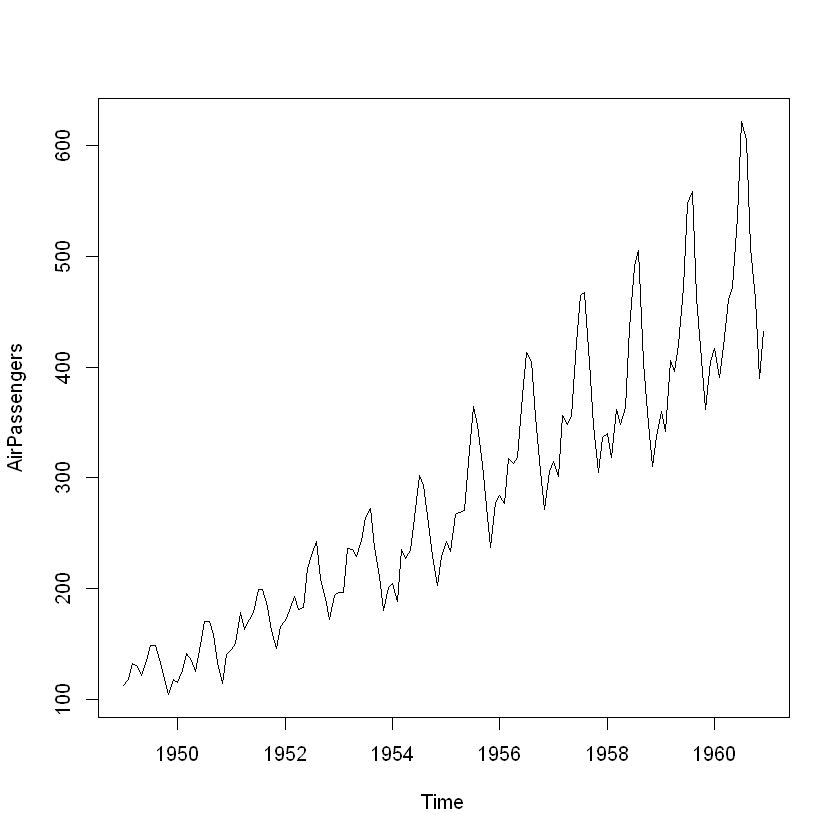

In [18]:
plot(AirPassengers)

In [19]:
 x <- rnorm(n = 100, mean = 0, sd = 10) + 1:100

In [21]:
mn <- function(n) rep(1/n, n)

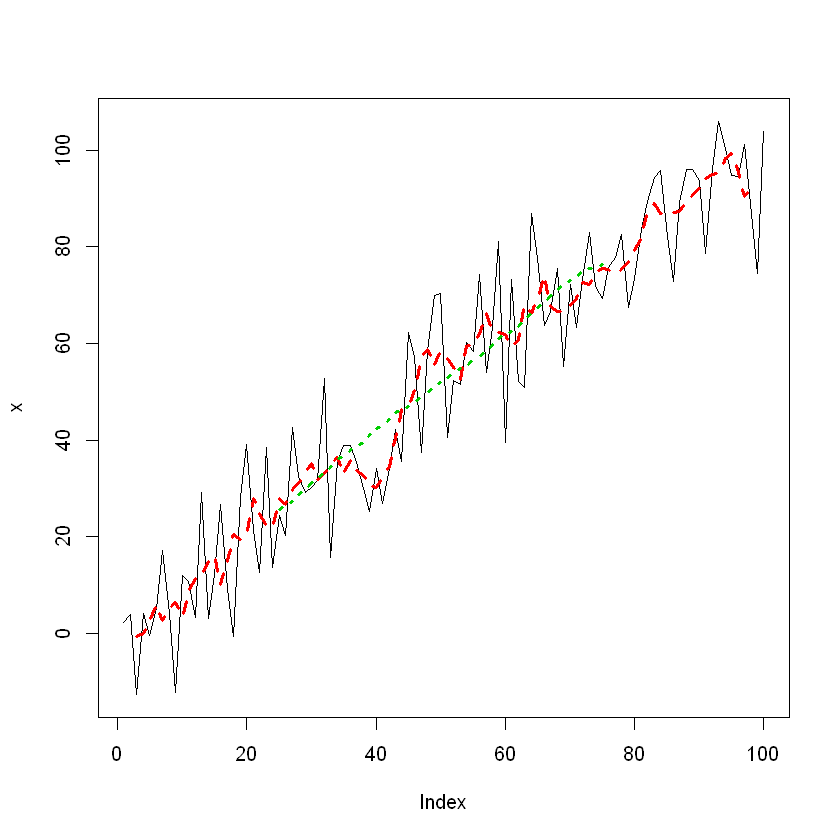

In [25]:
plot(x, type = 'l', lwd = 1)
lines(filter(x, mn( 5)), col = 2, lwd = 3, lty = 2)
lines(filter(x, mn(50)), col = 3, lwd = 3, lty = 3)

In [6]:
require(zoo)


Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [27]:
f1 <- rollapply(zoo(x), 20, function(w) min(w),
 align = "left", partial = TRUE)

In [28]:
f2 <- rollapply(zoo(x), 20, function(w) min(w),
 align = "right", partial = TRUE)

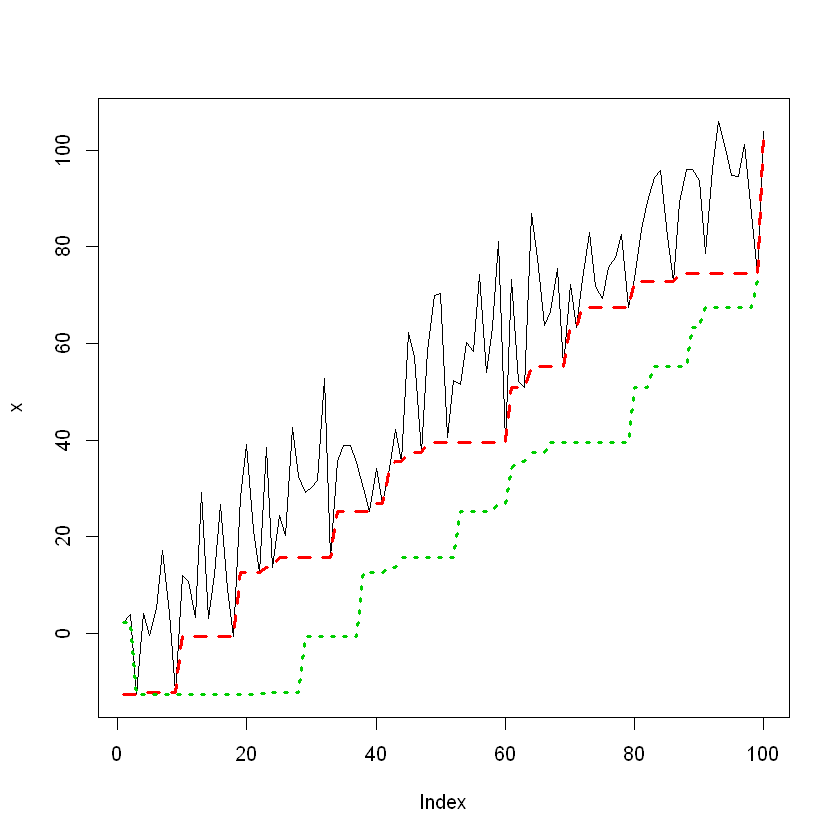

In [29]:
plot (x, lwd = 1, type = 'l')
lines(f1, col = 2, lwd = 3, lty = 2)
lines(f2, col = 3, lwd = 3, lty = 3)

In [ ]:
Rollling windows
Expanding windows


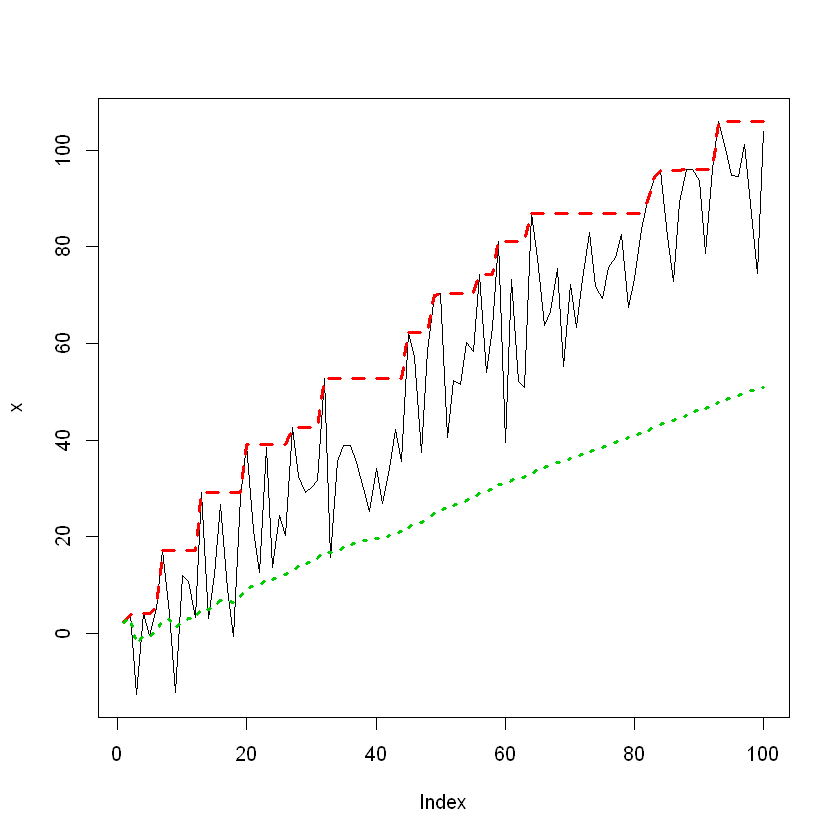

In [30]:
plot(x, type = 'l', lwd = 1)
lines(cummax(x), col = 2, lwd = 3, lty = 2) # max
lines(cumsum(x)/1:length(x), col = 3, lwd = 3, lty = 3) # mean

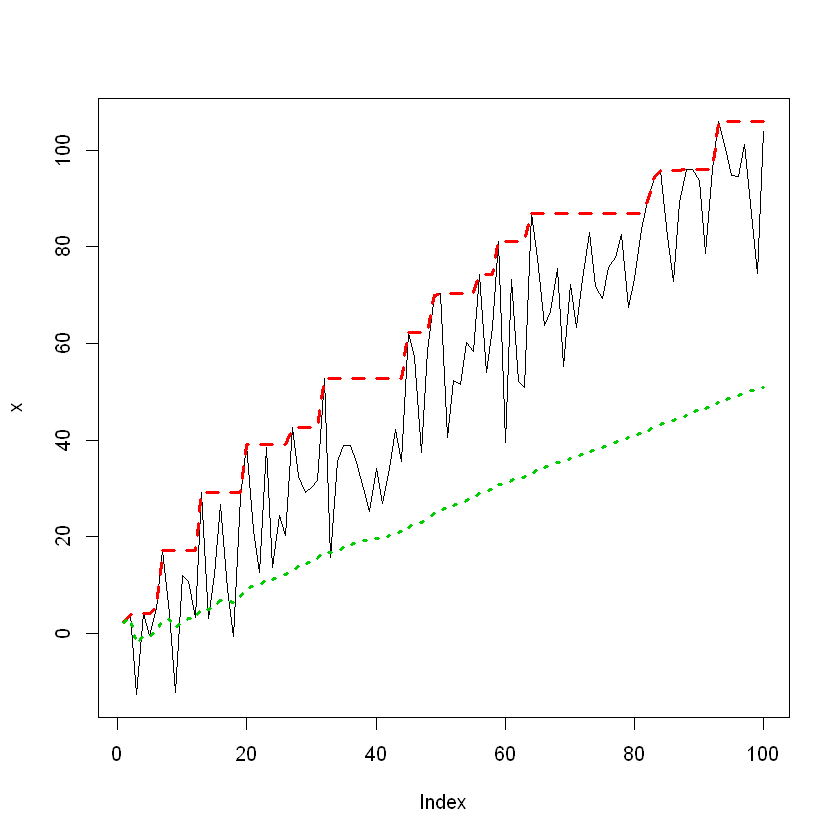

In [31]:
plot(x, type = 'l', lwd = 1)
lines(rollapply(zoo(x), seq_along(x), function(w) max(w),
partial = TRUE, align = "right"),
col = 2, lwd = 3, lty = 2)
lines(rollapply(zoo(x), seq_along(x), function(w) mean(w),
partial = TRUE, align = "right"),
col = 3, lwd = 3, lty = 3)

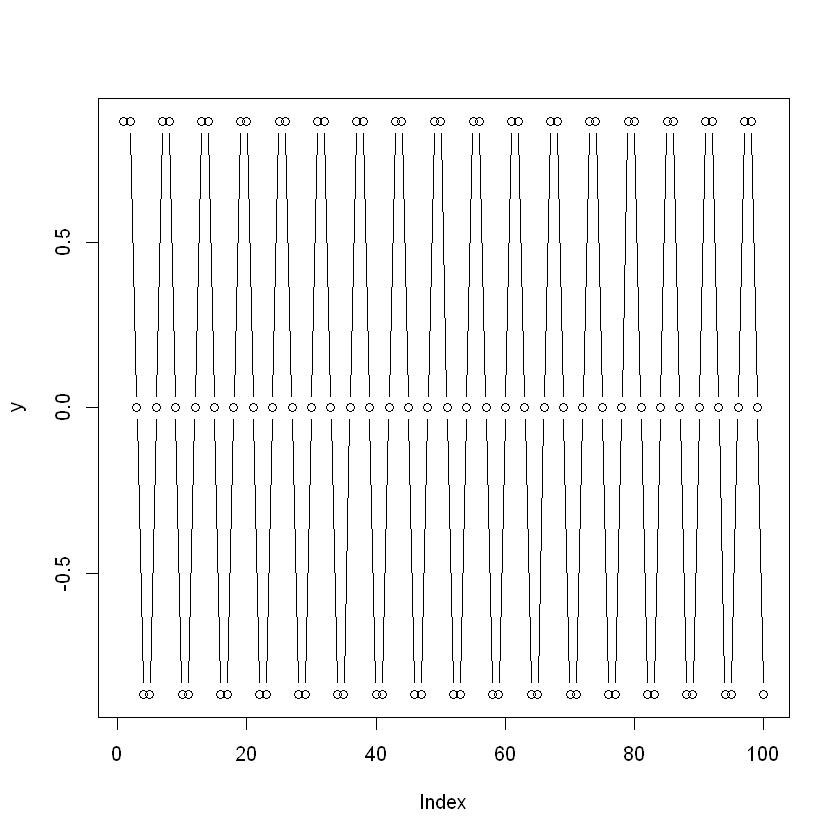

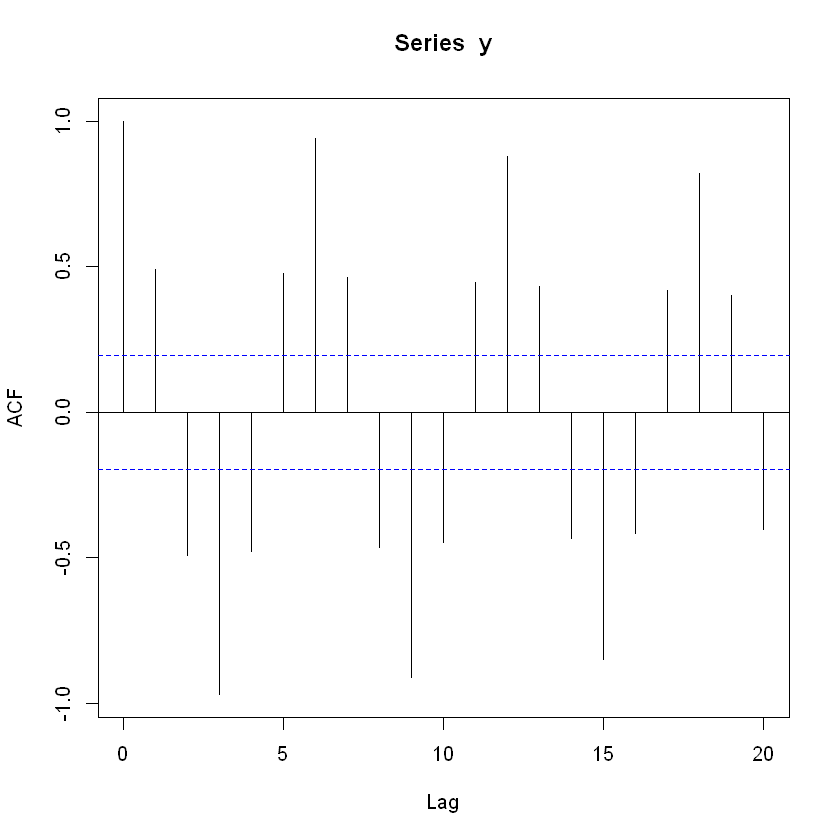

In [3]:
x <- 1:100
y <- sin(x * pi /3)
plot(y, type = "b")
acf(y)

In [10]:
require(dplyr)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
cor(y, shift(y, 1), use = "pairwise.complete.obs")

ERROR: Error in shift(y, 1): could not find function "shift"


In [ ]:
cor(y, shift(y, 2), use = "pairwise.complete.obs")


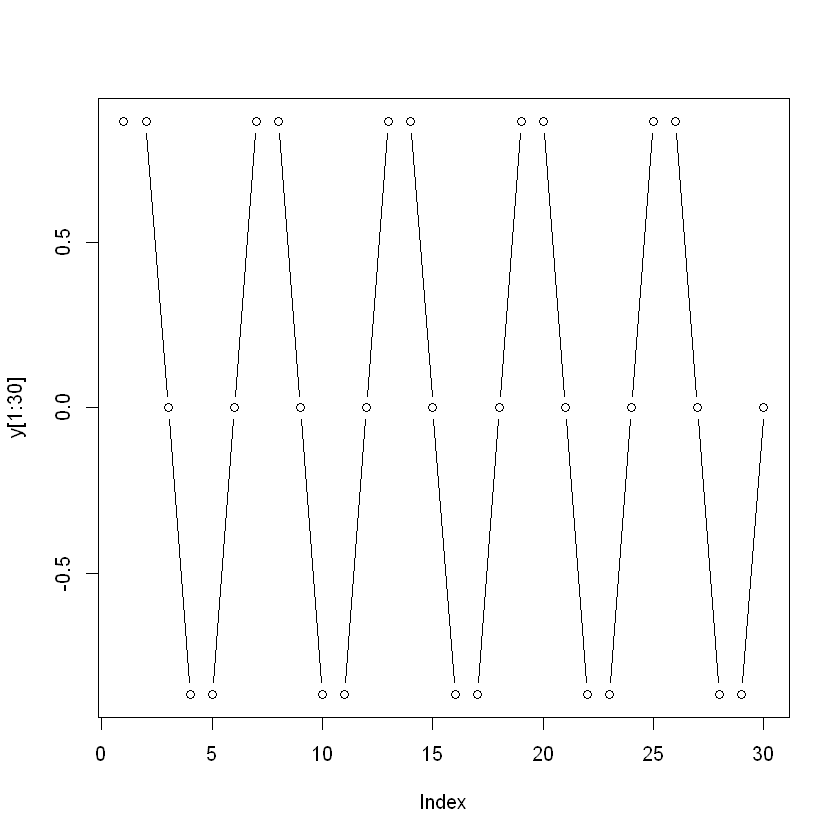

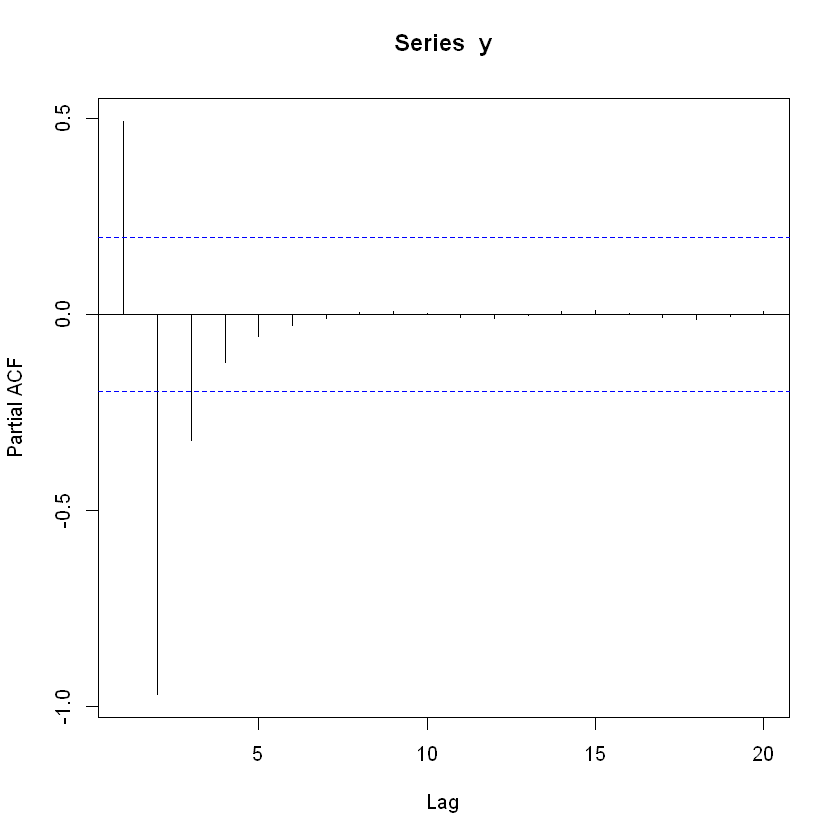

In [14]:
y <- sin(x * pi /3)
plot(y[1:30], type = "b")
pacf(y)

In [ ]:
"""A statistical rule for determining a significant nonzero ACF estimate
is given by a “critical region” with bounds at +/–1.96 × sqrt(n). This
rule relies on a sufficiently large sample size and a finite variance for
the process.
"""

In [ ]:
"""For a seasonal and noiseless process, such as the sine function, with period T,
the same ACF value will be seen at T, 2T, 3T, and so on up to infinity. An
ACF fails to weed out these redundant correlations. The PACF, on the other
hand, reveals which correlations are “true” informative correlations for
specific lags rather than redundancies. This is invaluable for knowing when
we have collected enough information to get a sufficiently long window at a
proper temporal scale for our data.
"""

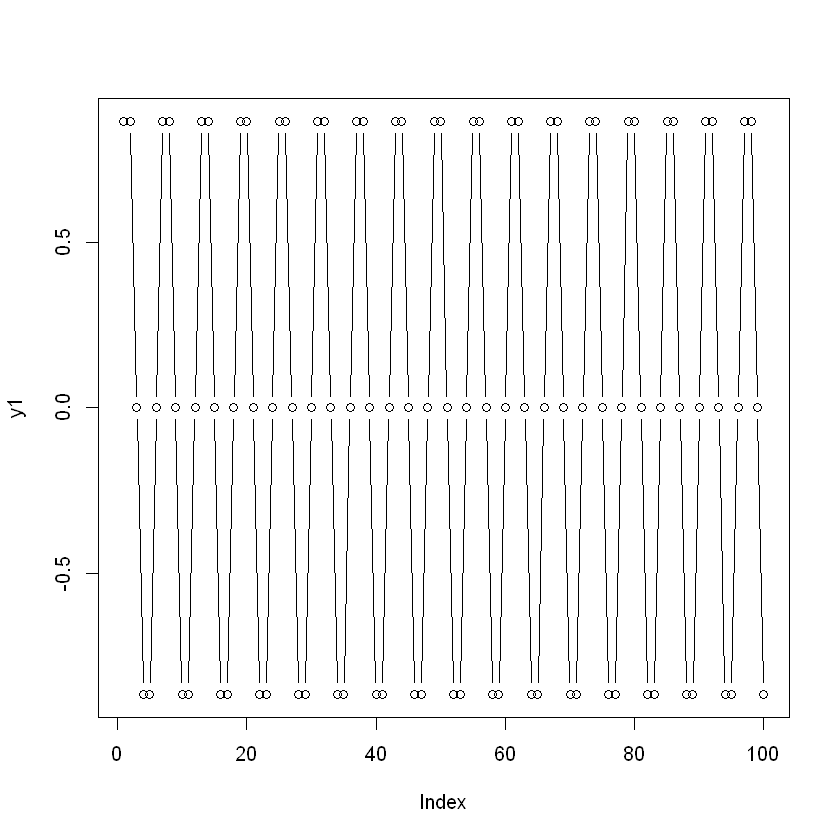

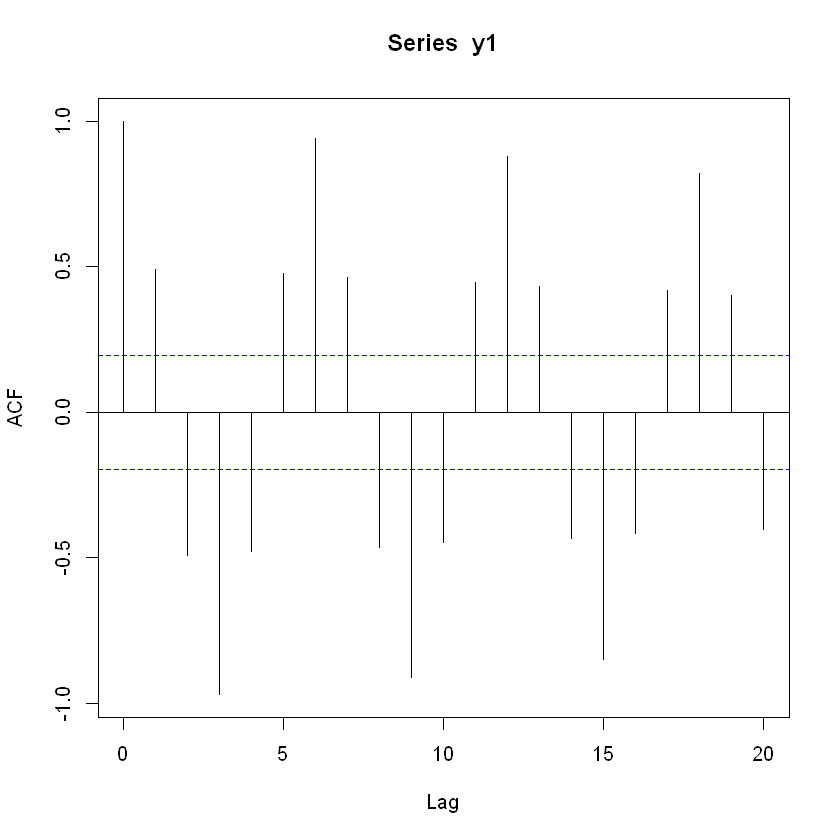

In [17]:
y1 <- sin(x * pi /3)
plot(y1, type = "b")
acf (y1)

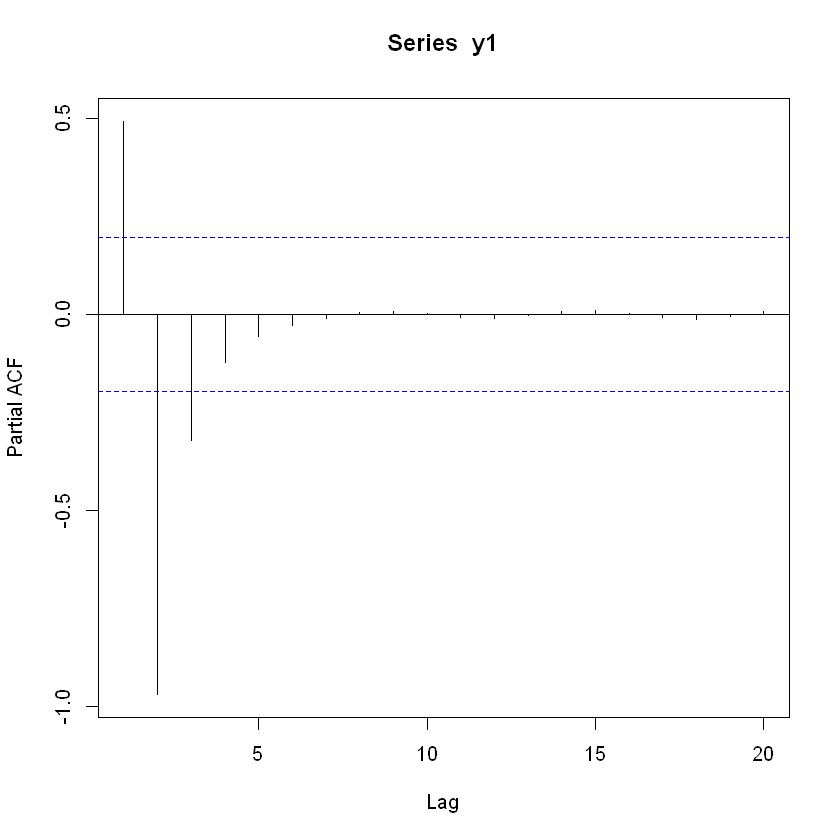

In [18]:
 pacf(y1)

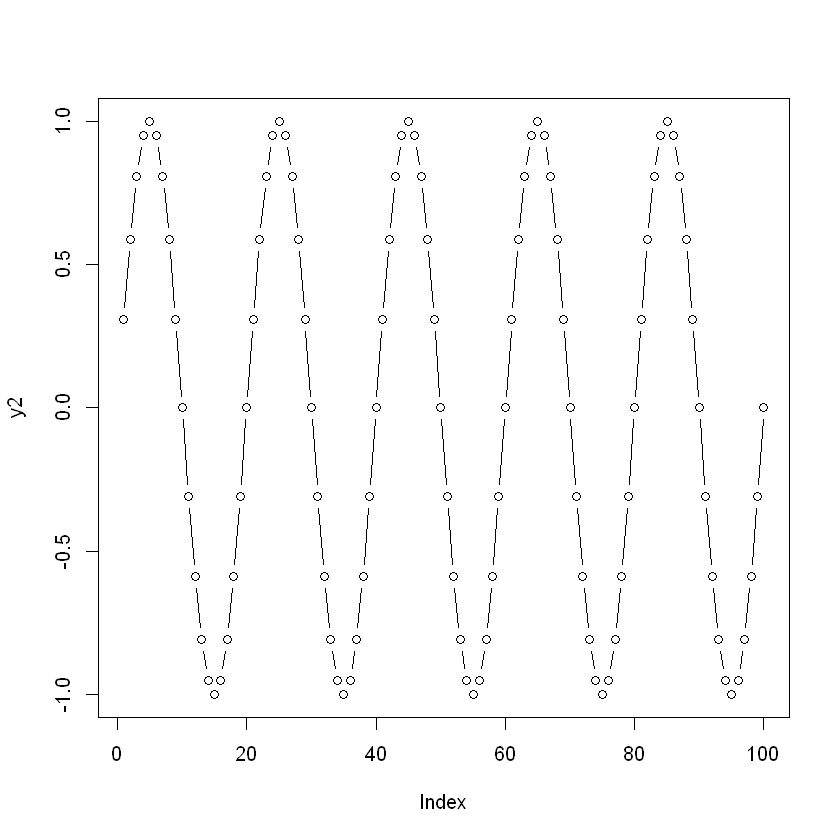

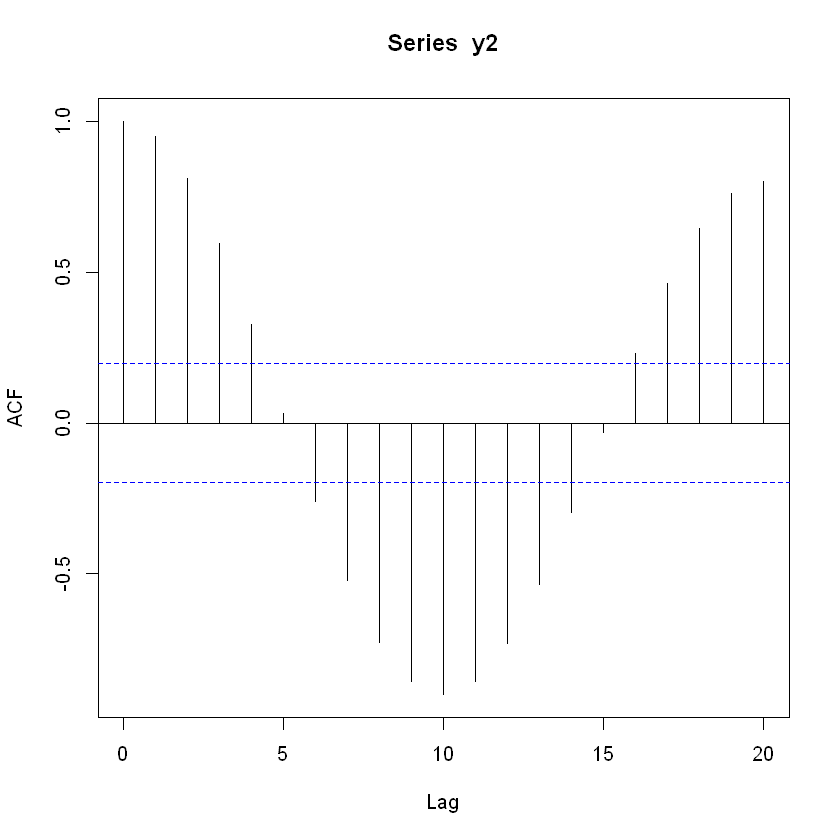

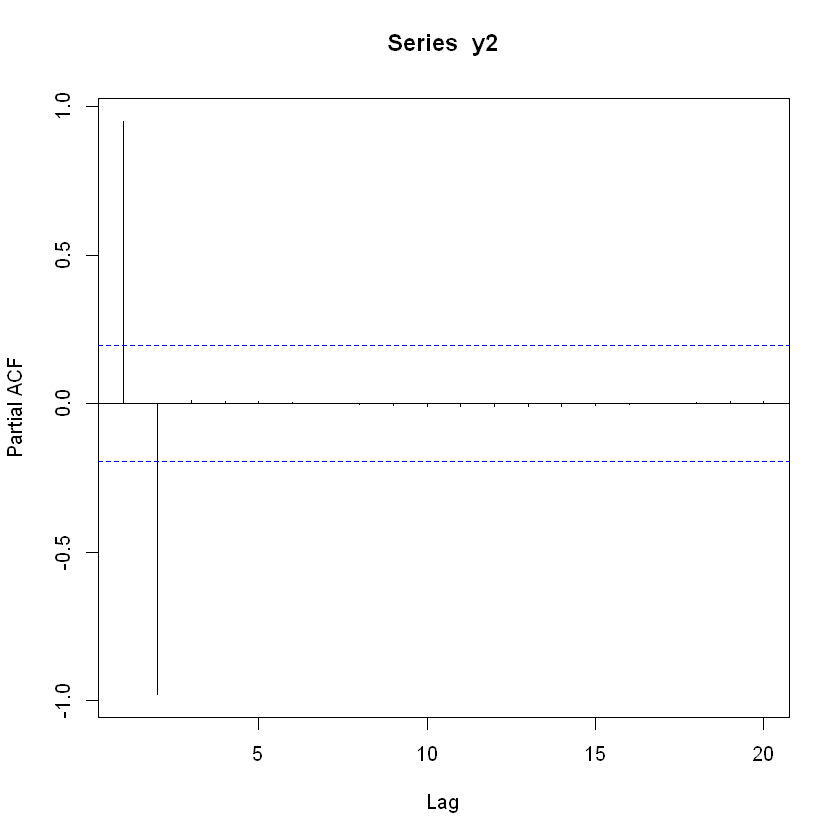

In [19]:
y2 <- sin(x * pi /10)
plot(y2, type = "b")
acf (y2)
pacf(y2)


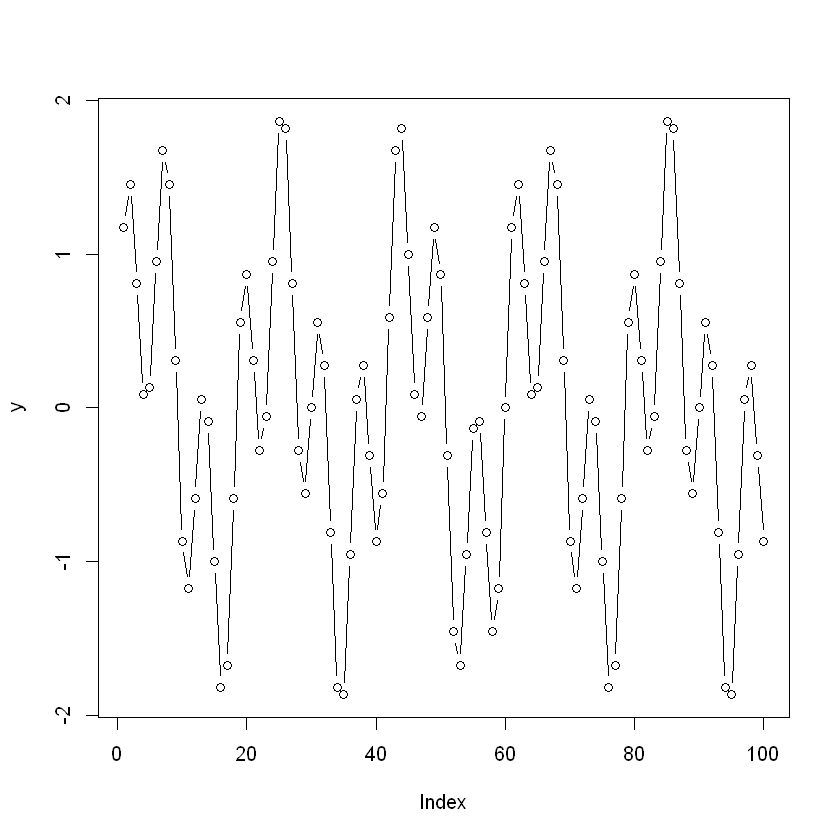

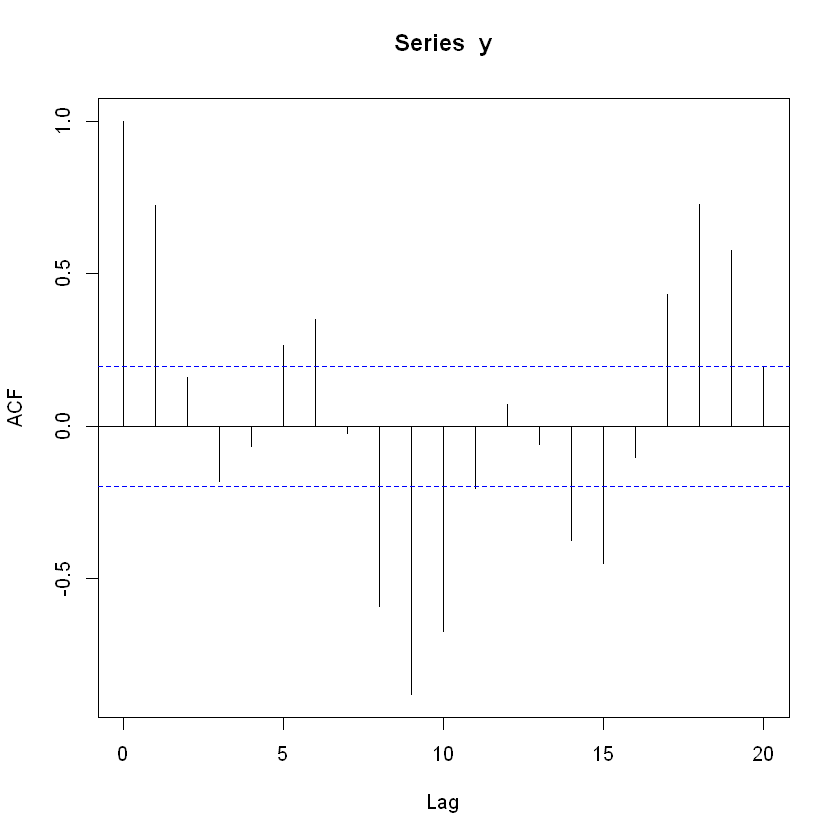

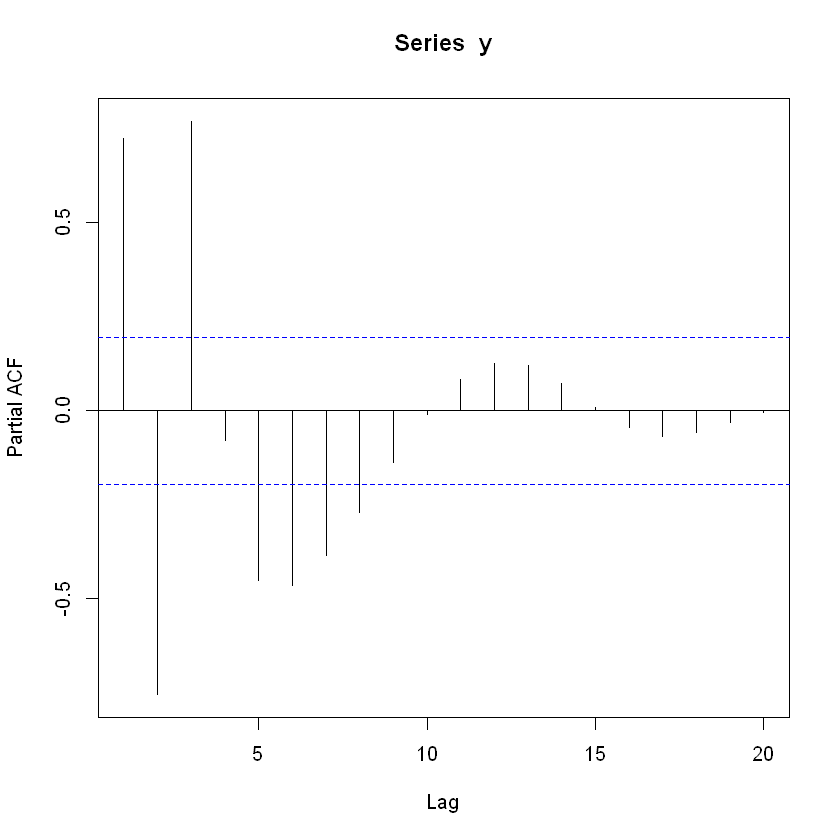

In [20]:
y <- y1 + y2
plot(y, type = "b")
acf (y)
pacf(y)

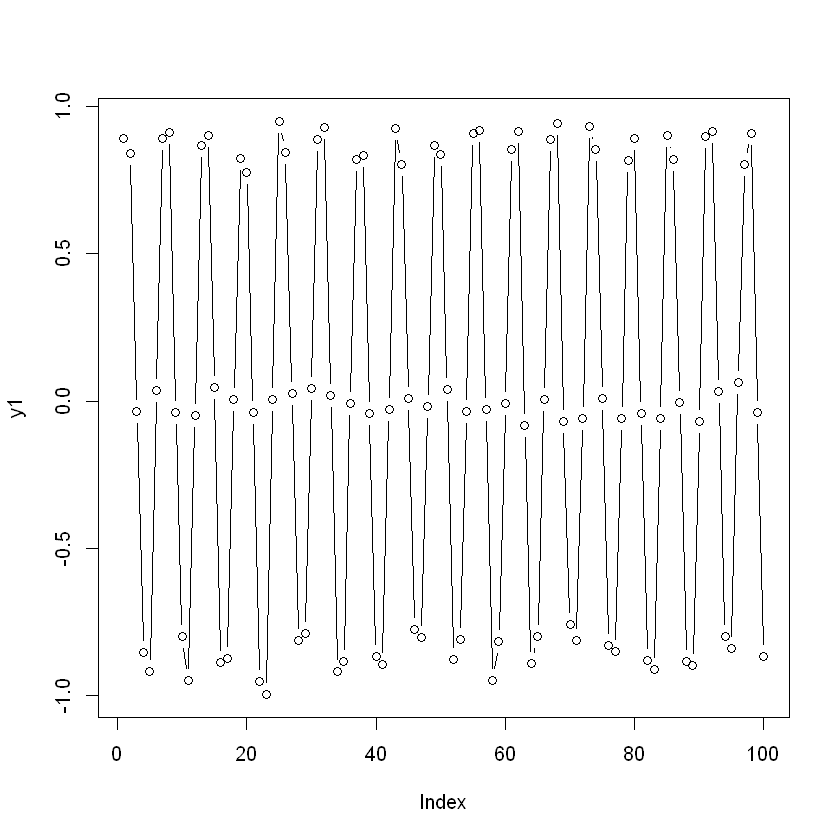

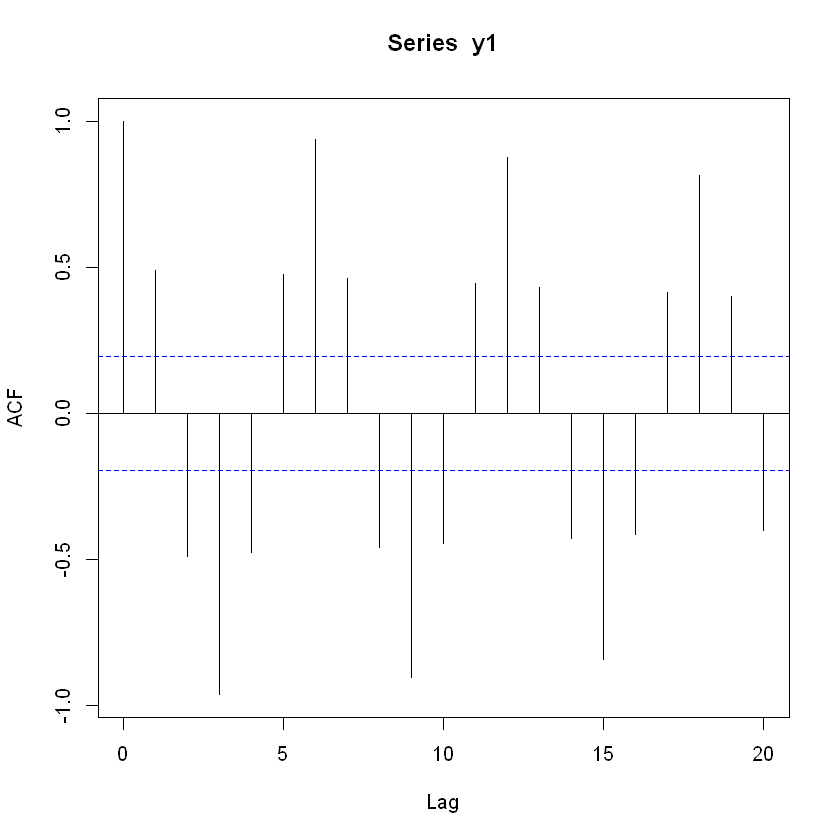

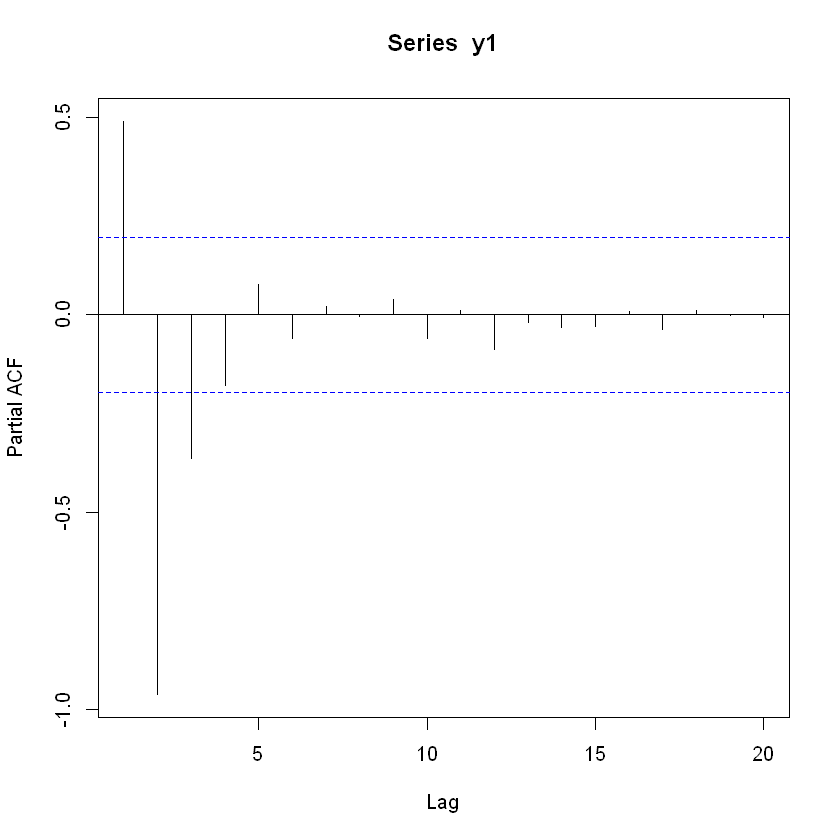

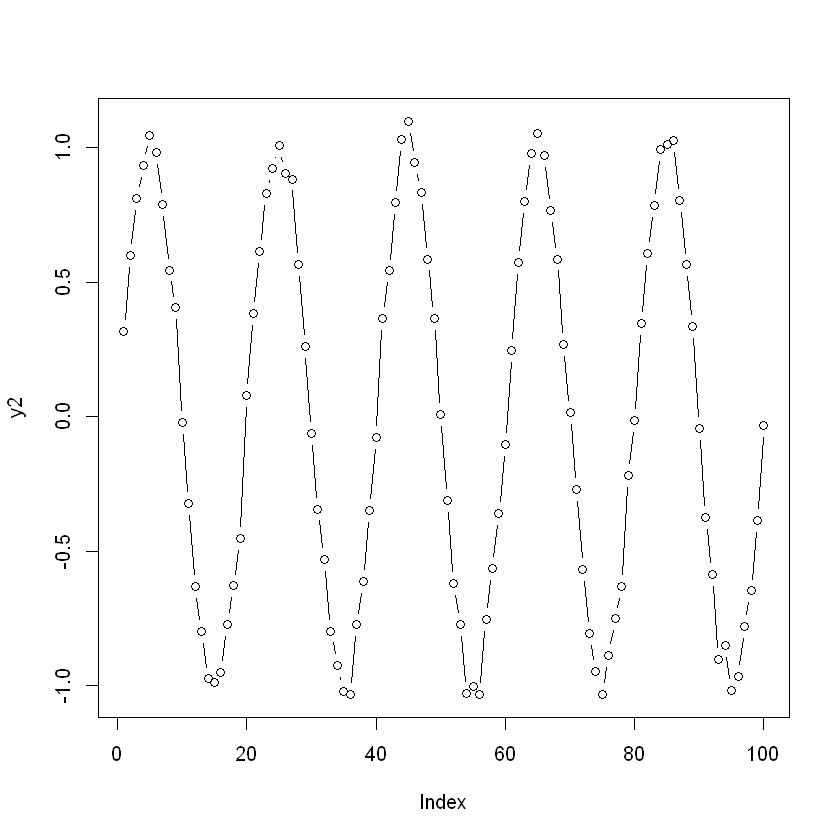

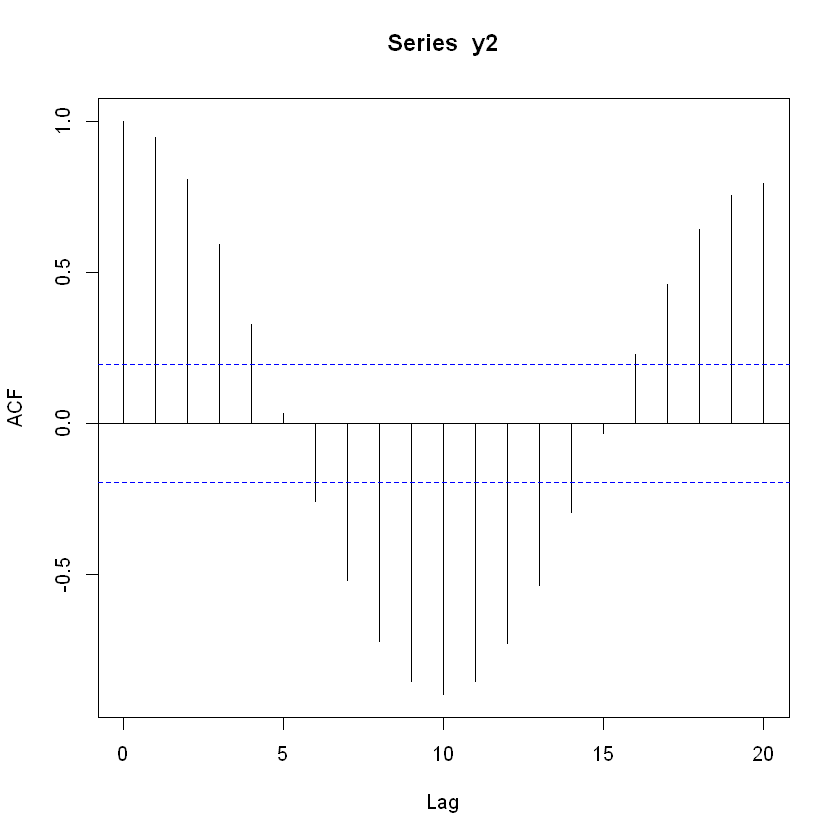

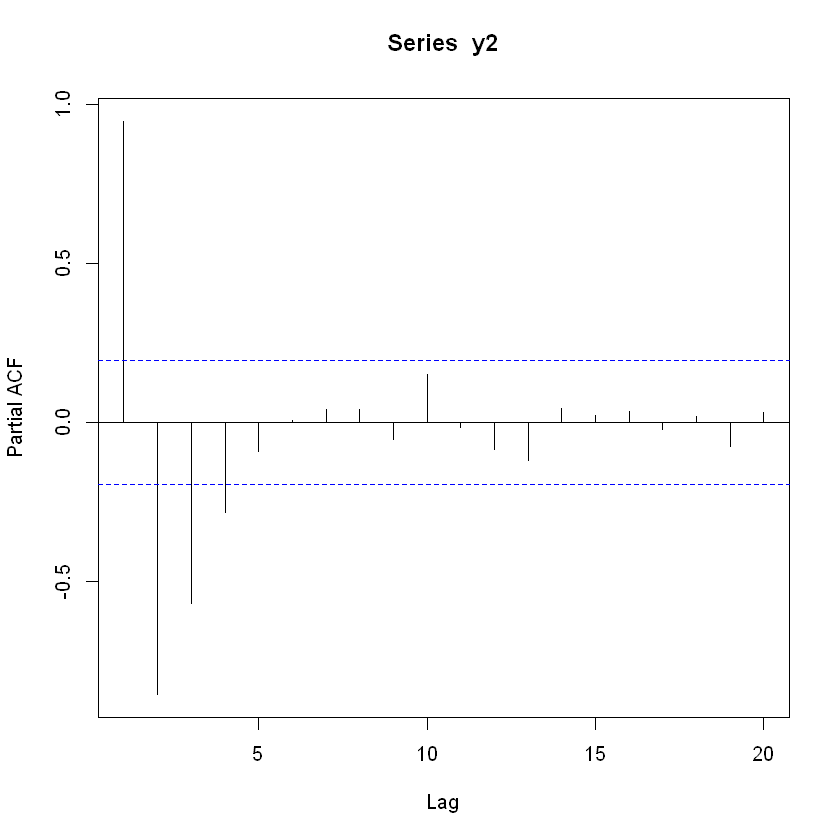

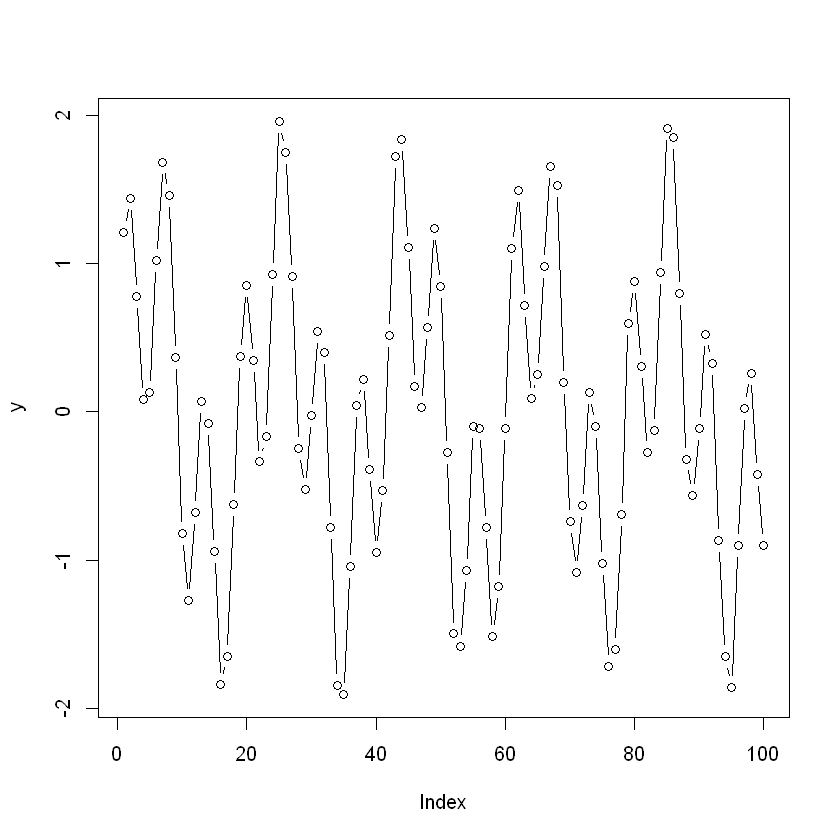

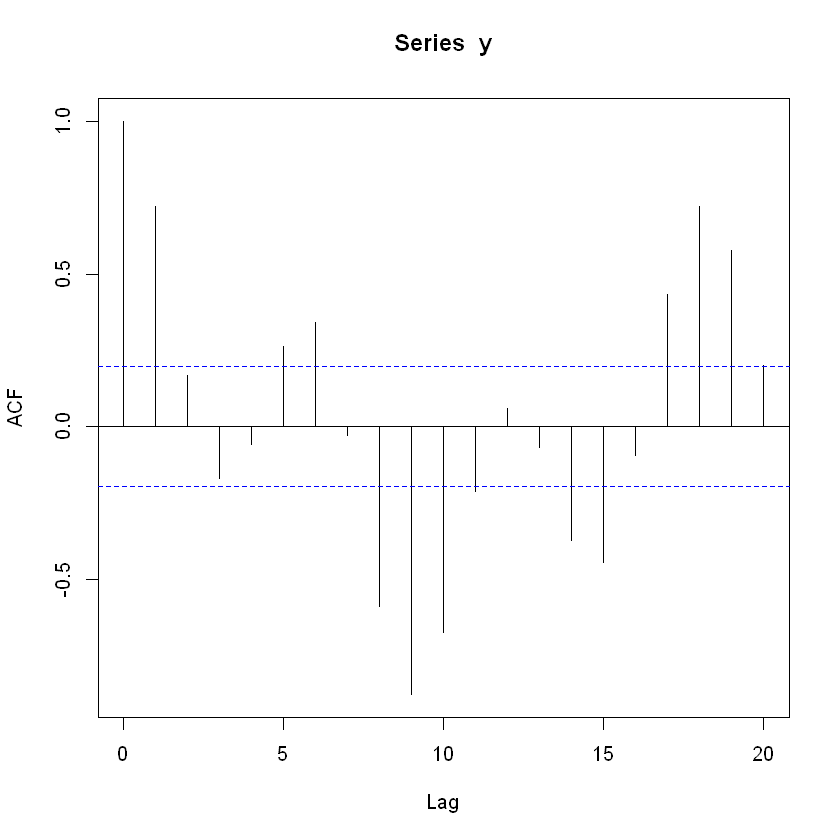

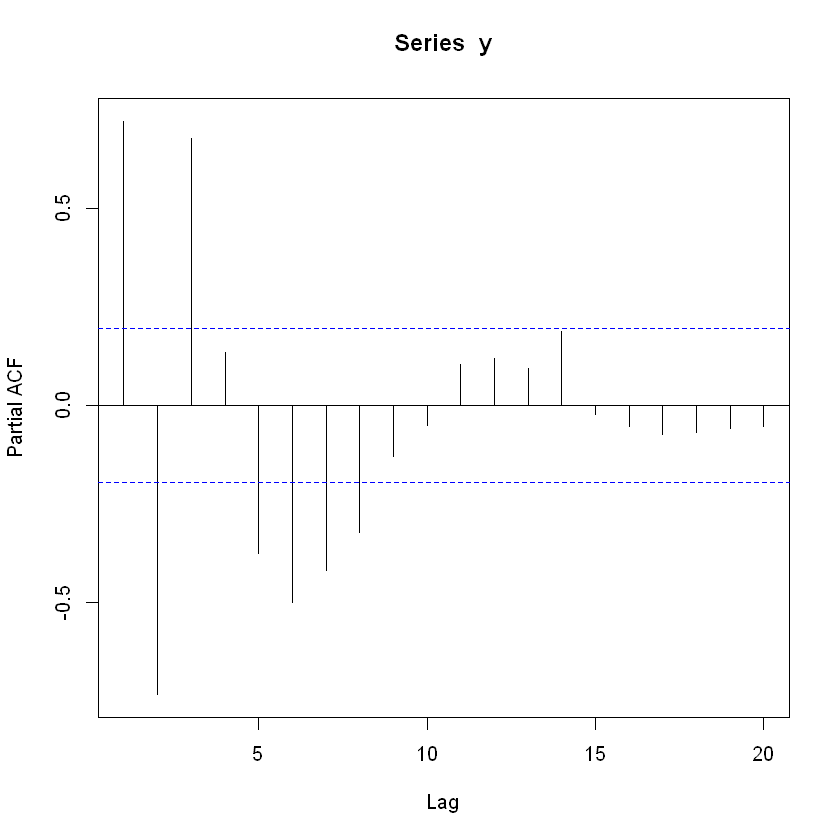

In [21]:
noise1 <- rnorm(100, sd = 0.05)
noise2 <- rnorm(100, sd = 0.05)
y1 <- y1 + noise1
y2 <- y2 + noise2
y <- y1 + y2
plot(y1, type = 'b')
acf (y1)
pacf(y1)
plot(y2, type = 'b')
acf (y2)
pacf(y2)
plot(y, type = 'b')
acf (y)
pacf(y)

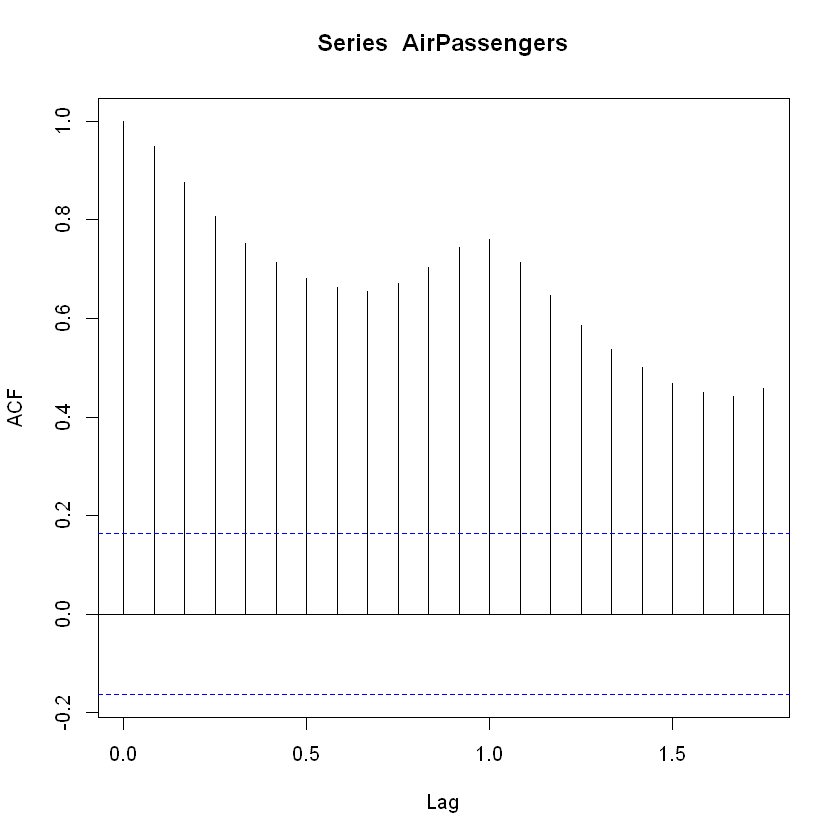

In [22]:
acf(AirPassengers)

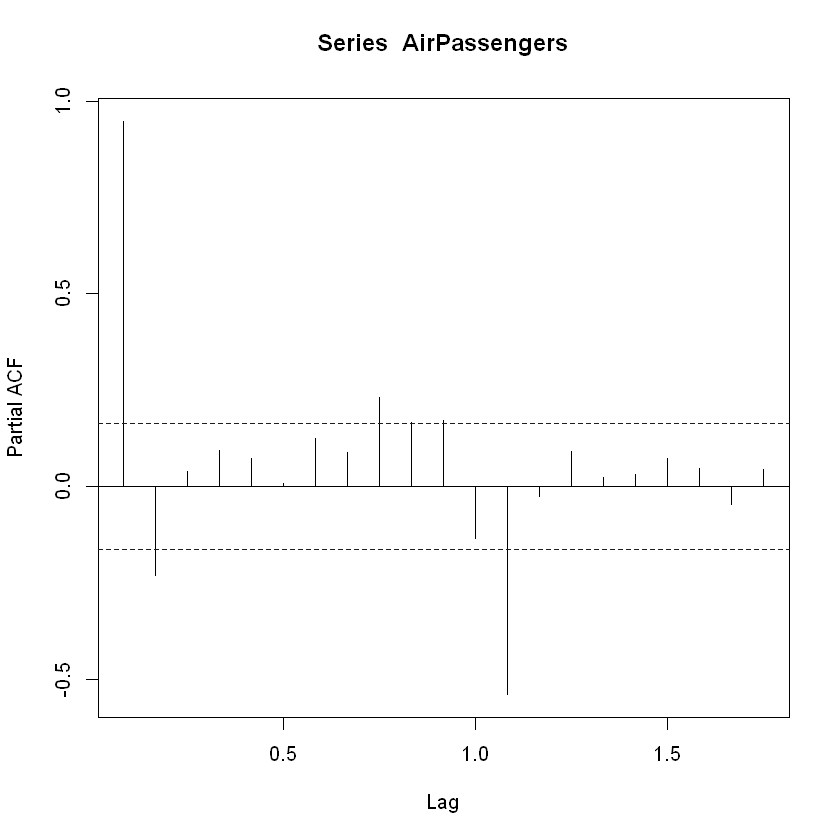

In [23]:
pacf(AirPassengers)

In [24]:
require(timevis)
donations <- fread("donations.csv")
d <- donations[, .(min(timestamp), max(timestamp)), user]
names(d) <- c("content", "start", "end")
d <- d[start != end]
timevis(d[sample(1:nrow(d), 20)])

Loading required package: timevis
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'timevis'"

ERROR: Error in fread("donations.csv"): could not find function "fread"


In [25]:
t(matrix(AirPassengers, nrow = 12, ncol = 12))

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
 [1,] 112  118  132  129  121  135  148  148  136  119   104   118  
 [2,] 115  126  141  135  125  149  170  170  158  133   114   140  
 [3,] 145  150  178  163  172  178  199  199  184  162   146   166  
 [4,] 171  180  193  181  183  218  230  242  209  191   172   194  
 [5,] 196  196  236  235  229  243  264  272  237  211   180   201  
 [6,] 204  188  235  227  234  264  302  293  259  229   203   229  
 [7,] 242  233  267  269  270  315  364  347  312  274   237   278  
 [8,] 284  277  317  313  318  374  413  405  355  306   271   306  
 [9,] 315  301  356  348  355  422  465  467  404  347   305   336  
[10,] 340  318  362  348  363  435  491  505  404  359   310   337  
[11,] 360  342  406  396  420  472  548  559  463  407   362   405  
[12,] 417  391  419  461  472  535  622  606  508  461   390   432

In [ ]:
colors <- c("green", "red", "pink", "blue",
> "yellow","lightsalmon", "black", "gray",
> "cyan", "lightblue", "maroon", "purple")
> matplot(matrix(AirPassengers, nrow = 12, ncol = 12),
> type = 'l', col = colors, lty = 1, lwd = 2.5,
> xaxt = "n", ylab = "Passenger Count")
> legend("topleft", legend = 1949:1960, lty = 1, lwd = 2.5,
> col = colors)
> axis(1, at = 1:12, labels = c("Jan", "Feb", "Mar", "Apr",
> "May", "Jun", "Jul", "Aug",
> "Sep", "Oct", "Nov", "Dec"))

In [28]:
require(forecast)

Loading required package: forecast
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


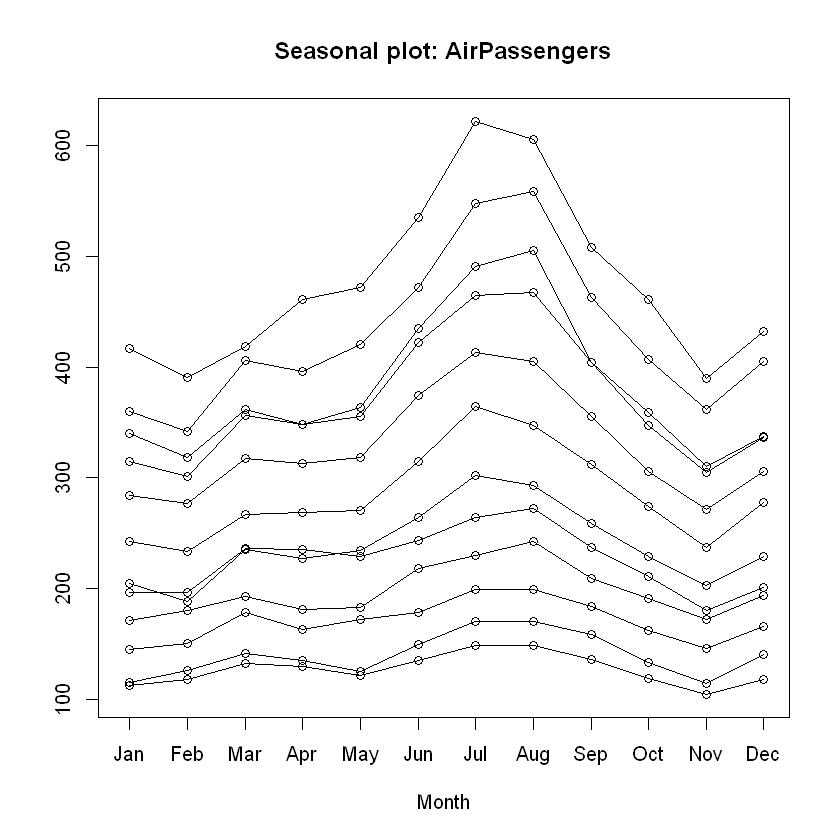

In [29]:
seasonplot(AirPassengers)

In [ ]:
> months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun",
> "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
> matplot(t(matrix(AirPassengers, nrow = 12, ncol = 12)),
> type = 'l', col = colors, lty = 1, lwd = 2.5)
> legend("left", legend = months,
> col = colors, lty = 1, lwd = 2.5)

In [ ]:
monthplot(AirPassengers)

In [ ]:
## R
> hist2d <- function(data, nbins.y, xlabels) {
> ## we make ybins evenly spaced to include
> ## minimum and maximum points
> ymin = min(data)
> ymax = max(data) × 1.0001
> ## the lazy way out to avoid worrying about inclusion/exclusion
> ybins = seq(from = ymin, to = ymax, length.out = nbins.y + 1 )
> ## make a zero matrix of the appropriate size
> hist.matrix = matrix(0, nrow = nbins.y, ncol = ncol(data))
> ## data comes in matrix form where each row
> ## represents one data point
> for (i in 1:nrow(data)) {
> ts = findInterval(data[i, ], ybins)
> for (j in 1:ncol(data)) {
> hist.matrix[ts[j], j] = hist.matrix[ts[j], j] + 1
> }
> }
> hist.matrix
> }


In [ ]:
 h = hist2d(t(matrix(AirPassengers, nrow = 12, ncol = 12)), 5, months)
> image(1:ncol(h), 1:nrow(h), t(h), col = heat.colors(5),
> axes = FALSE, xlab = "Time", ylab = "Passenger Count")

In [ ]:
"""
The use of a histogram
assumes a stationary data set
"""

In [ ]:
https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython/blob/master/data/50words_TEST.csv

In [31]:
require(data.table)

Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [33]:
require(plotly)

Loading required package: plotly
Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [34]:
require(data.table)

In [38]:
months = 1:12
ap = data.table(matrix(AirPassengers, nrow = 12, ncol = 12))
names(ap) = as.character(1949:1960)
ap[, month := months]
ap = melt(ap, id.vars = 'month')
names(ap) = c("month", "year", "count")
p <- plot_ly(ap, x = ~month, y = ~year, z = ~count,
color = ~as.factor(month)) %>%
add_markers() %>%
layout(scene = list(xaxis = list(title = 'Month'),
yaxis = list(title = 'Year'),
zaxis = list(title = 'PassengerCount')))

In [36]:
## R
file.location <- 'https://raw.githubusercontent.com/plotly/datasets/master/\
_3d-line-plot.csv'
data <- read.csv(file.location)
p <- plot_ly(data, x = ~x1, y = ~y1, z = ~z1,
type = 'scatter3d', mode = 'lines',
line = list(color = '#1f77b4', width = 1))

In [1]:
## R
fit <- ar(demand[["Banking orders (2)"]], method = "mle")
fit

ERROR: Error in is.ts(x): object 'demand' not found


In [ ]:
## R
> est <- arima(x = demand[["Banking orders (2)"]],
> order = c(3, 0, 0))
> est

In [ ]:
> est.1 <- arima(x = demand[["Banking orders (2)"]],
> order = c(3, 0, 0),
> fixed = c(0, NA, NA, NA))
> est.1

In [ ]:
## R
> fixed <- c(0, NA, NA, NA)

In [ ]:
## R
> acf(est.1$residuals)

In [ ]:
## R
> Box.test(est.1$residuals, lag = 10, type = "Ljung", fitdf = 3)

In [ ]:
> require(forecast)
> plot(demand[["Banking orders (2)"]], type = 'l')
> lines(fitted(est.1), col = 3, lwd = 2) ## use the forecast package

In [ ]:
## R
> fitted(est.1, h = 3)

In [ ]:
## R
> acf(demand[["Banking orders (2)"]])

In [ ]:
## R
> ma.est = arima(x = demand[["Banking orders (2)"]],
order = c(0, 0, 9),
fixed = c(0, 0, NA, rep(0, 5), NA, NA))
> ma.est

In [ ]:
## R
> Box.test(ma.est$residuals, lag = 10, type = "Ljung", fitdf = 3)

#Forecasting an MA(q) process

In [ ]:
## R
> fitted(ma.est, h=1)


In [ ]:
## R
> fitted(ma.est, h=10)

# ARIMA

In [2]:
## R
require(forecast)
set.seed(1017)
## order of arima model hidden on purpose
y = arima.sim(n = 1000, list(ar = ###, ma = ###))

ERROR: Error in parse(text = x, srcfile = src): <text>:6:0: unexpected end of input
4: ## order of arima model hidden on purpose
5: y = arima.sim(n = 1000, list(ar = ###, ma = ###))
  ^


In [ ]:
First, we should plot the time series, as we always
do, to see whether it appears stationary (Figure 6-8). 

Then we examine the ACF and PACF of y (Figure 6-9) and compare it with Table 6-1.

In [ ]:
## R
> ar1.ma1.model = Arima(y, order = c(1, 0, 1))
> par(mfrow = c(2,1))
> acf(ar1.ma1.model$residuals)
> pacf(ar1.ma1.model$residuals)

In [ ]:
## R
> ar2.ma1.model = Arima(y, order = c(2, 0, 1))
> plot(y, type = 'l')
> lines(ar2.ma1.model$fitted, col = 2)
> plot(y, ar2.ma1.model$fitted)
> par(mfrow = c(2,1))
> acf(ar2.ma1.model$residuals)
> pacf(ar2.ma1.model$residuals)

In [ ]:
## R
> ar2.ma2.model = Arima(y, order = c(2, 0, 2))
> plot(y, type = 'l')
> lines(ar2.ma2.model$fitted, col = 2)
> plot(y, ar2.ma2.model$fitted)
> par(mfrow = c(2,1))
> acf(ar2.ma2.model$residuals)
> pacf(ar2.ma2.model$residuals)
>
> ar2.d1.ma2.model = Arima(y, order = c(2, 1, 2))
> plot(y, type = 'l')
> lines(ar2.d1.ma2.model$fitted, col = 2)
> plot(y, ar2.d1.ma2.model$fitted)
> par(mfrow = c(2,1))
> acf(ar2.d1.ma2.model$residuals)
> pacf(ar2.d1.ma2.model$residuals)

In [ ]:
## R
> cor(y, ar1.ma1.model$fitted)
[1] 0.3018926
> cor(y, ar2.ma1.model$fitted)
[1] 0.4683598
> cor(y, ar2.ma2.model$fitted)
[1] 0.4684905
> cor(y, ar2.d1.ma2.model$fitted)
[1] 0.4688166


In [ ]:
## R
## original coefficients
> y = arima.sim(n = 1000, list(ar = c(0.8, -0.4), ma = c(-0.7)))
> ar2.ma1.model$coef


## Using automated model fitting


In [ ]:
## R
> est = auto.arima(demand[["Banking orders (2)"]],
stepwise = FALSE, ## this goes slower
## but gets us a more complete search
max.p = 3, max.q = 9)
> est

In [ ]:
## R
> auto.model = auto.arima(y)
> auto.model

In [ ]:
If you are going to make auto.arima() or a similar automated model
selection tool an important part of your analysis, it’s important to read the
documentation, experiment with synthetic data, and also read about other
analysts’ experiences with this function

# Vector Autoregression

In [4]:
## R
VARselect(demand[, 11:12, with = FALSE], lag.max=4,
+ type="const")

ERROR: Error in parse(text = x, srcfile = src): <text>:3:7: unexpected '='
2: VARselect(demand[, 11:12, with = FALSE], lag.max=4,
3: + type=
         ^


In [ ]:
## R
> est.var <- VAR(demand[, 11:12, with = FALSE], p=3, type="const")
> est.var


In [ ]:
## R
> est.var <- VAR(demand[, 11:12, with = FALSE], p=3, type="const")
> est.var
> par(mfrow = c(2, 1))
> plot(demand$`Banking orders (2)`, type = "l")
> lines(fitted(est.var)[, 1], col = 2)
> plot(demand$`Banking orders (3)`,
> type = "l")
> lines(fitted(est.var)[, 2], col = 2)
> par(mfrow = c(2, 1))
> acf(demand$`Banking orders (2)` - fitted(est.var)[, 1])
> acf(demand$`Banking orders (3)` -
> fitted(est.var)[, 2])


In [ ]:
Portmanteau test for
serial correlation via the vars package serial.test() metho

In [ ]:
## R
> serial.test(est.var, lags.pt = 8, type="PT.asymptotic")

In [ ]:
SARIMA

In [ ]:
ARCH, GARCH, and their many brethren


In [ ]:
Hierarchical time series models


In [ ]:
One convenient way to handle hierarchical time series is via R’s hts package.


# Advantages and Disadvantages of Statistical Methods for Time Series

# Chapter 7. State Space Models for Time Series


In [ ]:
The Kalman filter applied to a linear Gaussian model

In [ ]:
Hidden Markov Models


In [ ]:
Bayesian structural time series


# State Space Models: Pluses and Minuses


# The Kalman Filter
